# Project: Investigate the Data "No-show Appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row;

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

#          Question(s) for Analysis
- How do we identify people that showed up for the appointment?
- What Neighbourhood has the highest number of individuals who are patients
- Does age of patient affect the rate at which patient show up for the appointment?
- Question: What percentage of Gender exist in this dataset.
- Does a patients Age affect the show up to Appointment or Not?

In [2]:
    #Importing Necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading my dataset.
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
##   Data Wrangling

After gathering my data, the next step will be to access my data and understand my dataset to enable me clean my dataset and prepare it for visualization, this will enable me gain insights from my data 

In [4]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


The above code cell prints the first ten rows of my dataset

In [6]:
data.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


The above code cell also prints the last ten rows of my dataset 

## Data Inspection

To do this i will thoroughly look through my dataset to find out the following   ``info, shape, duplicate, null_values, etc.``

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can clearly see that there are a total of ``110527 entries``, which consists of ``14 columns``, the datatype of the variables of this dataset are ``object, float and int``

In [8]:
data.shape

(110527, 14)

The above cell shows the number rows and column in the data set

In [9]:
# lets see if there are null values in the dataset
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

so it appears that there are no missing values in the dataset.

In [10]:
# lets look at a more descriptive way of checking the columns of the dataset
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

looking closely i can see some errors in the spelling of some column names such as ``hypertension, handcap`` and this could have happened during the entry of these column titles.

In [11]:
# Overview of the dataset
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Note** 
- i just noticed that the minimum Age in this data set to be -1 which is incorrect!, but i will have to correct that in the data cleaning stage.

In [12]:
data.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000



### Data Cleaning
In this stage we will look at the data thoroughly to double check on it again
 

In [13]:
data.rename (columns = {'Hipertension': 'Hypertension','Handcap':'Handicap'}, inplace = True,)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


i just changed the titles of the columns although i might still drop the columns that are not necessary.

In [14]:
# Drop all unneccessary columns 
data.drop(columns= ['PatientId','AppointmentID','Hypertension', 'Handicap', 'Diabetes'], inplace= True)

In [15]:
data

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,No
...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,1,No


In [16]:
# lets look at the Age column and see the Ages that are less than 0

data[data.Age<0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,No


In [17]:
##data.drop([data.Age<0].value_counts().index,inplace =True)
data.drop(data[data['Age']<0].index, inplace = True)

In [18]:
data['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [19]:
#data.iloc[99832]
data.iloc[99832]

Gender                               M
ScheduledDay      2016-06-06T07:50:27Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                  1
Neighbourhood           FORTE SÃO JOÃO
Scholarship                          0
Alcoholism                           0
SMS_received                         0
No-show                             No
Name: 99833, dtype: object

So with what happened above i noticed that there was someone's age registered as -1 which is impossible since no one has a negative age. As we can see with the described code `data.describe`there isnt a negative age anymore but i also went further to use the locate integer code `data.iloc` to determine the actual description of the row 99832

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110526 non-null  object
 1   ScheduledDay    110526 non-null  object
 2   AppointmentDay  110526 non-null  object
 3   Age             110526 non-null  int64 
 4   Neighbourhood   110526 non-null  object
 5   Scholarship     110526 non-null  int64 
 6   Alcoholism      110526 non-null  int64 
 7   SMS_received    110526 non-null  int64 
 8   No-show         110526 non-null  object
dtypes: int64(4), object(5)
memory usage: 8.4+ MB


i just notice that the datatype for the column ``ScheduledDay`` and ``AppointmentDay`` is object which is suppose to be `Datetime stamp`, Therefor i may need to change it.

In [21]:
# Lets convert ScheduledDay and AppointmentDay to date time 
data['ScheduledDay'] = data['ScheduledDay'].astype('datetime64[ns]')
data['AppointmentDay']= data['AppointmentDay'].astype('datetime64[ns]')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110526 non-null  object        
 1   ScheduledDay    110526 non-null  datetime64[ns]
 2   AppointmentDay  110526 non-null  datetime64[ns]
 3   Age             110526 non-null  int64         
 4   Neighbourhood   110526 non-null  object        
 5   Scholarship     110526 non-null  int64         
 6   Alcoholism      110526 non-null  int64         
 7   SMS_received    110526 non-null  int64         
 8   No-show         110526 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 8.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis



In [23]:
# i copied my data because i would like to have a different variable name when plot 
# this is because i wouldn't want to use the parameter data = data
new_data = data.copy()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110526 non-null  object        
 1   ScheduledDay    110526 non-null  datetime64[ns]
 2   AppointmentDay  110526 non-null  datetime64[ns]
 3   Age             110526 non-null  int64         
 4   Neighbourhood   110526 non-null  object        
 5   Scholarship     110526 non-null  int64         
 6   Alcoholism      110526 non-null  int64         
 7   SMS_received    110526 non-null  int64         
 8   No-show         110526 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 8.4+ MB


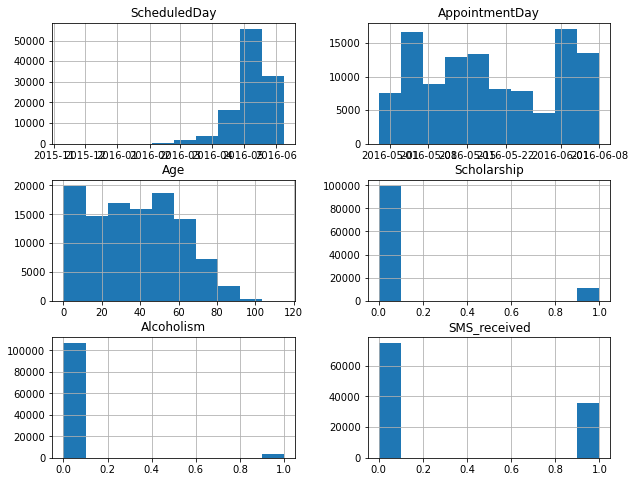

In [41]:
# lets have a look at the distribution of the variables of this dataset
data.hist (figsize = [10,8]);

We can clearly see that individual who have the scholarship are way less than those who have, and there very few persons who have an alcohol addiction, also there is a normal distribution in age ranging from 0 -100 in this dataset and people who recieved sms are not up to the people who didn't.

### How do we identify people that showed up for the appointment?

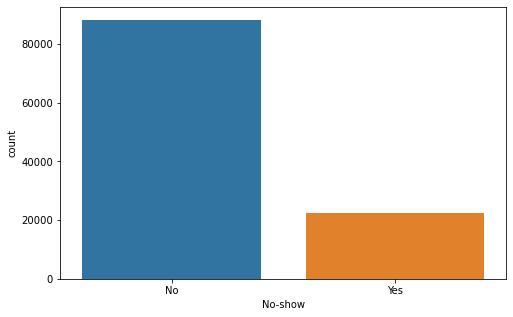

In [42]:
# Lets look at the people who showed up and who didn't
plt.figure(figsize = [8,5])
sns.countplot(data = data, x = 'No-show');

So the above plot shows that we have more people who didn't show up than people who did

## Question : What Neighbourhood has the highest number of individuals who are patients

In [43]:
data['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

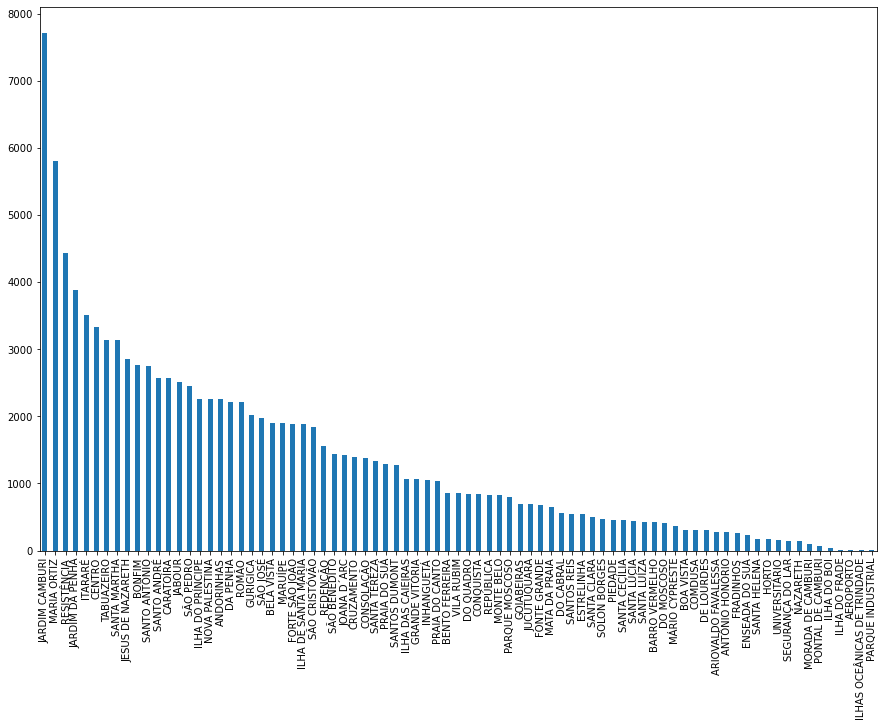

In [44]:
new_data['Neighbourhood'].value_counts().plot(kind = 'bar', figsize = [15,10]);

We can see clearly that Jardum Camburi has the highest number of individuals who had appointments and Parque Industrial had the least

### Question: Does age of patient affect the rate at which patient show up for the appointment?

In [45]:
# lets look at the gender column and see what relationship this might have with the No-show
new_data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [46]:
new_data['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

Text(0, 0.5, 'Count')

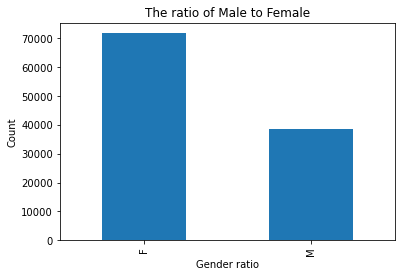

In [47]:
new_data.Gender.value_counts().plot(kind = 'bar');
plt.title('The ratio of Male to Female')
plt.xlabel('Gender ratio')
plt.ylabel('Count')

**insight**
- We can see that there are more females than males in this dataset. we shall see what this will tell us as we go further.

In [48]:
# lets create a percentage of the gender counts
percentage = new_data.Gender.value_counts()/len(new_data)*100
percentage

F    64.997376
M    35.002624
Name: Gender, dtype: float64

Hmm so the percentage of female to male is 64 and 35, lets see this in a pie chart shall we?

In [49]:
df= pd.DataFrame(percentage)
df

,Gender
F,64.997376
M,35.002624


So i decided to create a new dataframe having the percentage of the Gender to view with a pie chart.

## Question: What percentage of Gender exist in this dataset.

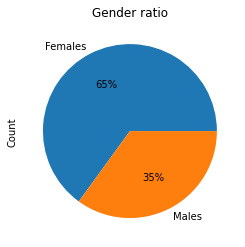

In [50]:
# lets see the percentage of the Gender variable

df['Gender'].plot(kind = 'pie', labels = ['Females', 'Males'], autopct ='%1.0f%%' )
plt.ylabel('Count')
plt.title('Gender ratio');

**Insight**
- ok this is intereseting so from the previous chat we saw the huge difference between the male and female occurence, but here with the pie chart we can actually see that 65% of individuals are female while 35% are male

In [51]:
# Lets explore the Age column
new_data['Age'].mean()

37.089218826339504

so it appears that the mean age here is 37 years

Text(0.5, 1.0, 'The distribution of Age')

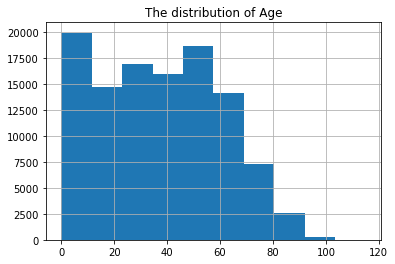

In [52]:
new_data['Age'].hist();
plt.title('The distribution of Age')

So it appears that the highest peak here is between 0-20 years and the data seems to be alittle bit skewed to the right but lets dive into a deeper analysis shall we?

In [24]:
# Lets create a mask to use in the plots as we visualize 
missen = new_data['No-show'] == 'Yes'
show_up = new_data['No-show'] == 'No'

### Question: Does a patients Age affect the show up to Appointment or Not?

In [31]:
def label(x, y, t):
    """
    Args:
    x(str): x-axis title
    y(str): y axis title
    t(str) title
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()


Thank you so much for the amazing review i never thougt of this and i will surely put this into good practice

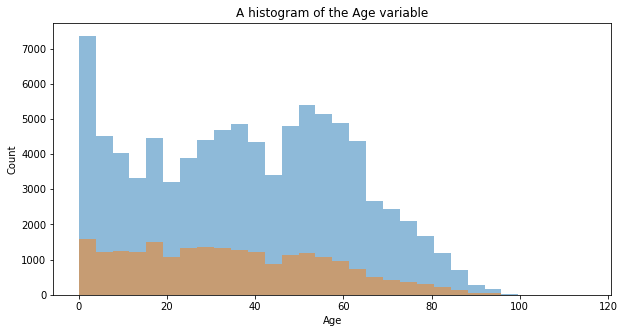

In [32]:
# lets find out if there is a relationship between missing the appointment and the age of patients
plt.figure(figsize=[10,5])
new_data[show_up].Age.plot(kind = 'hist', alpha = 0.5, bins = 30, label ='show_up')
new_data[missen].Age.plot(kind ='hist', alpha = 0.5, bins = 30, label ='missen')
label('Age','Count','A histogram of the Age variable');

Hmm so it seems that alot of people actually show up  although i can say that people who are older dont miss their appointment as much as the younger persons and the younger persons tend to attend appointments more although the ratio of people who missed is more than the older persons

<a id='conclusions'></a>
## Conclusions

 This is an interesting dataset, i was able to extract my dataset and understanding the basics of exploring and cleaning my dataset by identifying errors, missing values and performing little transformation, just as indicated at the begining of the extraction phase questions like which neighbourhood had the highest appointment came to mind, and this was seen in the visualization phase, i also got to understand the use of certain codes to tell the frequency of various values in the dataset.
## My limitations
my greatest limitation is time, i am unable to grab the concepts as fast as i should be because i have less than 14 days to submit 3 projects, also the power supply factor has a role in my delay, but that not withstanding i wont quit and i am sure i will speak of this experience for a long time to come. Aside the data wrangling and cleaning process, although with the help of google and stackoverfowlwas able to perform what i could, also the very short
timing to be able to investigate the dataset further and also little complications with loading the the ipynb in my local machine this made my journey abit
gruesome as i had to find out how to use the os function to find directories and also install the likes of panda which was already installed in my local machine
to cut it all short my major limitation was timing and majority of the codes were new to me.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])